In [2]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

/home/jarvis/Documents/Git/TDA-NBA/notebooks


In [13]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import libraries for features decomposition
import sklearn as sk

## Reading CSV file

In [4]:
df = pd.read_csv('../Data/NBA-preprocessed-data.csv')

In [5]:
df.head()

,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,...,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,...,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,...,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,...,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,...,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,...,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C


## Assign position label for each player

In [6]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}

In [16]:
position_labels = [dict[x] for x in df['PosicAbbrev']]

## Building new dataframe with only numeric variables

In [18]:
df2 = df.select_dtypes(include=['number']).drop('Unnamed: 0',1)
df2.head()

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,...,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,...,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,...,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,...,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,...,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,...,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8


## Scaling data

In [23]:
df2 = sk.preprocessing.scale(df2)
df2

array([[ 0.89655488,  0.58617874,  0.51855115, ..., -0.13882344,
        -0.22125994,  0.0975079 ],
       [-1.60177473,  0.95732708,  0.2755481 , ..., -0.13882344,
         0.15064427, -0.1952208 ],
       [-1.37465386, -1.39327911, -0.75721486, ..., -0.13882344,
        -1.31926284,  0.03245708],
       ..., 
       [-1.37465386,  1.1222819 ,  0.09329581, ..., -0.13882344,
         1.00071104, -1.04088149],
       [ 1.5779175 ,  0.54494003,  0.57930191, ...,  0.74224268,
         1.23093745,  0.06498249],
       [ 1.12367575,  0.87484967,  0.7615542 , ..., -0.13882344,
         0.04438593,  0.13003331]])

## Simply plot

### Plot 3D

In [24]:
pca = sk.decomposition.PCA(n_components=10)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.43475204,  0.15423664,  0.06942175,  0.06189472,  0.04020476,
        0.03975554,  0.03523419,  0.02762718,  0.02496428,  0.02066755])

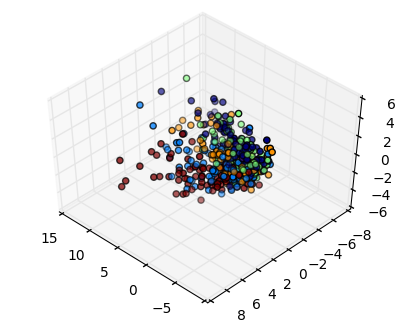

In [25]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=position_labels)

### Plot 2D

In [26]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(df2)
reduced_df_2 = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.43475204,  0.15423664])

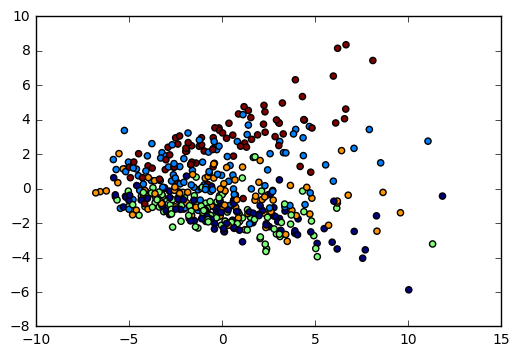

In [27]:
import pylab
pylab.scatter(reduced_df_2[:, 0], reduced_df[:, 1], c=position_labels)
pylab.show()

## Reduce dimensionality

### Using PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(df2)
pca_array = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.43475204,  0.15423664,  0.06942175,  0.06189472,  0.04020476,
        0.03975554])

In [29]:
sum(pca.explained_variance_ratio_)

0.80026544971443025

In [30]:
columns = ["col "+str(i) for i in range(1,len(pca_array[0])+1)]
pca_df = pd.DataFrame(data=pca_array, columns=columns)
pca_df.head()

,col 1,col 2,col 3,col 4,col 5,col 6
0,-0.818362,-1.745823,-1.054732,-0.326380,-0.283649,0.723419
1,1.680696,1.813241,-0.050192,-1.385147,1.558887,-0.008480
2,-5.192094,-0.442799,1.206296,1.114864,1.868035,-0.376957
3,-3.096610,0.062153,0.198832,-0.798300,0.614774,0.795504
4,4.197414,1.290535,-1.744407,-0.016021,0.171099,-0.618143


### Using SVD

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4, n_iter=7, random_state=42)
svd.fit(df2)
svd_array = svd.transform(df2)

In [32]:
svd_array
#print(sum(svd.explained_variance_ratio_)) 

array([[-0.81836191, -1.74582274, -1.05473208, -0.3263804 ],
       [ 1.68069558,  1.81324131, -0.05019202, -1.38514697],
       [-5.19209411, -0.44279884,  1.20629591,  1.11486389],
       ..., 
       [ 2.37665018, -2.10368468,  0.74359898, -2.1279606 ],
       [ 3.42944512,  2.07851596, -0.27745682,  0.38495529],
       [ 2.92533467,  3.98975704, -0.51397833, -0.09167732]])

In [33]:
columns = ["col "+str(i) for i in range(1,len(svd_array[0])+1)]
svd_df = pd.DataFrame(data=svd_array, columns=columns)
svd_df.head()

,col 1,col 2,col 3,col 4
0,-0.818362,-1.745823,-1.054732,-0.326380
1,1.680696,1.813241,-0.050192,-1.385147
2,-5.192094,-0.442799,1.206296,1.114864
3,-3.096610,0.062153,0.198832,-0.798300
4,4.197414,1.290535,-1.744407,-0.016021


### Using MDS

In [34]:
from sklearn.manifold import MDS
mds = MDS(n_components=6, metric=True, random_state=42, dissimilarity='euclidean')
mds_array = mds.fit_transform(df2)


In [35]:
print(mds_array)

[[-1.19949286  0.72533499 -1.52778387  0.13625503 -0.71627292  1.38564238]
 [-0.41525097 -1.66638291  1.0814337  -0.78247771  2.47899031 -0.86876738]
 [ 3.53602375  0.59456929 -0.75685897 -2.34052624 -1.56129524  3.86943804]
 ..., 
 [-2.6362554   1.34629587 -0.35635296 -2.25172056  1.40679915 -1.30749691]
 [-1.29770637 -1.57094806  0.39896736  2.60609609  0.44160012 -3.83951429]
 [ 0.21262157 -1.88393826 -0.11387977  3.62870667  3.461435   -2.80925402]]


In [36]:
columns = ["col "+str(i) for i in range(1,len(mds_array[0])+1)]
mds_df = pd.DataFrame(data=mds_array, columns=columns)
mds_df.head()

,col 1,col 2,col 3,col 4,col 5,col 6
0,-1.199493,0.725335,-1.527784,0.136255,-0.716273,1.385642
1,-0.415251,-1.666383,1.081434,-0.782478,2.478990,-0.868767
2,3.536024,0.594569,-0.756859,-2.340526,-1.561295,3.869438
3,1.660186,-0.578199,-1.942976,-1.223285,-0.219685,1.934374
4,-3.251077,-1.772707,2.043152,2.205953,1.458783,-1.959110


### Using feature selection

In [37]:
columnstoignore = [0,1,4,6,7,9,10,12,13,17]
selected_df = df2.drop(df2.columns[columnstoignore], axis=1, inplace=False)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [111]:
print len(selected_df.columns)

16


## Applying agglomerative clustering method

In [179]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### To the whole dataset

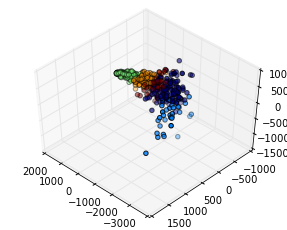

In [141]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(df2)
ward_labels = model.labels_
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)
from sklearn.metrics.cluster import adjusted_rand_score

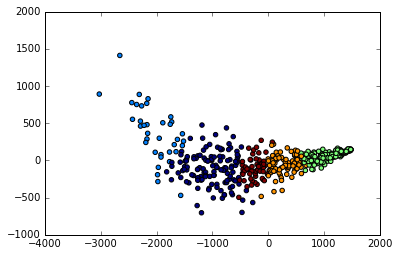

In [142]:
import pylab
pylab.scatter(reduced_df[:, 0], reduced_df[:, 1], c=ward_labels)

In [143]:
print "Random index score: " + str(adjusted_rand_score(ward_labels, position_labels))

Random index score: 0.00364044347633


In [144]:
from sklearn.metrics import silhouette_score
print "Silhouette score: " + str(silhouette_score(df2, ward_labels))

Silhouette score: 0.342136010362


### To the selected dataset

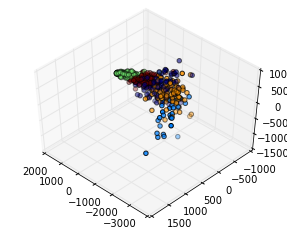

In [163]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(selected_df)
ward_labels = model.labels_
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)
from sklearn.metrics.cluster import adjusted_rand_score

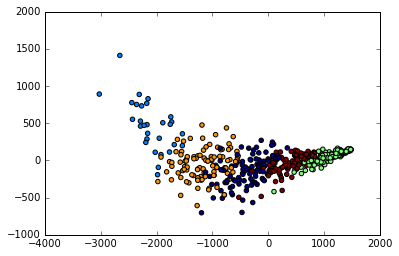

In [164]:
import pylab
pylab.scatter(reduced_df[:, 0], reduced_df[:, 1], c=ward_labels)

In [165]:
print "Random index score: " + str(adjusted_rand_score(ward_labels, position_labels))

Random index score: 0.00196934302636


In [166]:
from sklearn.metrics import silhouette_score
print "Silhouette score: " + str(silhouette_score(df2, ward_labels))

Silhouette score: 0.314521028624


### To the PCA reduced dataset

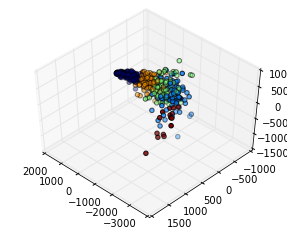

In [167]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(pca_df)
ward_labels = model.labels_
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)
from sklearn.metrics.cluster import adjusted_rand_score

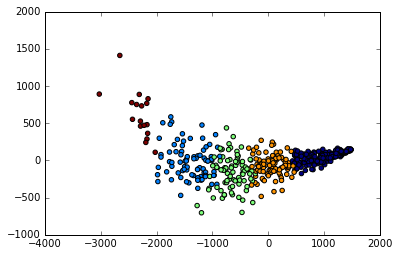

In [168]:
import pylab
pylab.scatter(reduced_df[:, 0], reduced_df[:, 1], c=ward_labels)

In [169]:
print "Random index score: " + str(adjusted_rand_score(ward_labels, position_labels))

Random index score: -0.000303048840405


In [170]:
from sklearn.metrics import silhouette_score
print "Silhouette score: " + str(silhouette_score(df2, ward_labels))

Silhouette score: 0.374841327219


### To the SVD reduced dataset

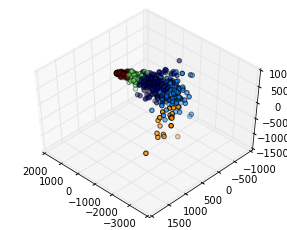

In [171]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(svd_df)
ward_labels = model.labels_
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)
from sklearn.metrics.cluster import adjusted_rand_score

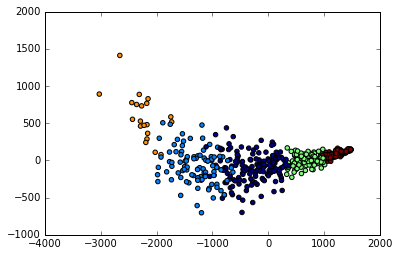

In [172]:
import pylab
pylab.scatter(reduced_df[:, 0], reduced_df[:, 1], c=ward_labels)

In [173]:
print "Random index score: " + str(adjusted_rand_score(ward_labels, position_labels))

Random index score: -0.00069187872807


In [174]:
from sklearn.metrics import silhouette_score
print "Silhouette score: " + str(silhouette_score(df2, ward_labels))

Silhouette score: 0.360567579448


### To the MDS reduced dataset

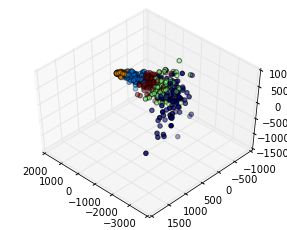

In [175]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(mds_df)
ward_labels = model.labels_
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)
from sklearn.metrics.cluster import adjusted_rand_score

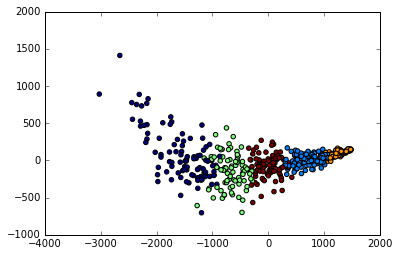

In [176]:
import pylab
pylab.scatter(reduced_df[:, 0], reduced_df[:, 1], c=ward_labels)

In [177]:
print "Random index score: " + str(adjusted_rand_score(ward_labels, position_labels))

Random index score: -0.000234098354557


In [178]:
from sklearn.metrics import silhouette_score
print "Silhouette score: " + str(silhouette_score(df2, ward_labels))

Silhouette score: 0.327502828058
